In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
df = pd.read_csv("../../Data/sangwonKim/pop_house_car_inout.csv", index_col='년도')
df.head()

,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
년도,,,,,,,,,
2013,서울특별시,10143645,5007869,5135776,NaN,NaN,38236908,1520090,1620640
2013,부산광역시,3527635,1747000,1780635,NaN,NaN,17823849,478451,496161
2013,대구광역시,2501588,1246071,1255517,NaN,NaN,14657442,351873,363224
2013,인천광역시,2879782,1448835,1430947,NaN,NaN,20338870,461613,439578
2013,광주광역시,1472910,730216,742694,NaN,NaN,8495770,226696,229288


In [48]:
df.dropna(how='any', axis=0, inplace=True)
df

,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
년도,,,,,,,,,
2015,서울특별시,10022181,4930943,5091238,2793244.0,79049.0,38236908,1589431,1726687
2015,부산광역시,3513777,1735570,1778207,1164352.0,86626.0,17823849,507031,520591
2015,대구광역시,2487829,1237291,1250538,738100.0,29610.0,14657442,351424,364364
2015,인천광역시,2925815,1469869,1455946,942244.0,47402.0,20338870,473223,463685
2015,광주광역시,1472199,729662,742537,486527.0,26705.0,8495770,224603,233875
...,...,...,...,...,...,...,...,...,...
2021,전라북도,1786855,888994,897861,747880.0,89358.0,11633570,223710,229511
2021,전라남도,1832803,922221,910582,811478.0,116001.0,14414723,223619,228106
2021,경상북도,2626609,1323661,1302948,1103666.0,129848.0,18160295,317866,314529


In [58]:
df[df.index==2020]

,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
년도,,,,,,,,,
2020,서울특별시,9668465,4701723,4966742,3015371.0,96629.0,38236908,1578127,1642977
2020,부산광역시,3391946,1661000,1730946,1275859.0,113410.0,17823849,491829,506176
2020,대구광역시,2418346,1193109,1225237,809802.0,39069.0,14657442,347248,364083
2020,인천광역시,2942828,1473943,1468885,1032774.0,65861.0,20338870,444556,460304
2020,광주광역시,1450062,717348,732714,538275.0,41585.0,8495770,226163,232246
2020,대전광역시,1463882,730699,733183,496875.0,26983.0,8410085,232321,243418
2020,울산광역시,1136017,583708,552309,394634.0,30241.0,7019991,136112,149696
2020,세종특별자치시,355831,177568,178263,136887.0,14385.0,75608185,78934,65909
2020,경기도,13427014,6754469,6672545,4495115.0,272358.0,2286965,2152572,1984199


## 정규화

In [24]:
from sklearn import preprocessing

In [49]:
# 최대값과 최소값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()

In [59]:
col = df.columns[1:]
x = df[col].values
x

array([[1.0022181e+07, 4.9309430e+06, 5.0912380e+06, 2.7932440e+06,
        7.9049000e+04, 3.8236908e+07, 1.5894310e+06, 1.7266870e+06],
       [3.5137770e+06, 1.7355700e+06, 1.7782070e+06, 1.1643520e+06,
        8.6626000e+04, 1.7823849e+07, 5.0703100e+05, 5.2059100e+05],
       [2.4878290e+06, 1.2372910e+06, 1.2505380e+06, 7.3810000e+05,
        2.9610000e+04, 1.4657442e+07, 3.5142400e+05, 3.6436400e+05],
       [2.9258150e+06, 1.4698690e+06, 1.4559460e+06, 9.4224400e+05,
        4.7402000e+04, 2.0338870e+07, 4.7322300e+05, 4.6368500e+05],
       [1.4721990e+06, 7.2966200e+05, 7.4253700e+05, 4.8652700e+05,
        2.6705000e+04, 8.4957700e+06, 2.2460300e+05, 2.3387500e+05],
       [1.5187750e+06, 7.5977800e+05, 7.5899700e+05, 4.6888500e+05,
        2.6419000e+04, 8.4100850e+06, 2.2077400e+05, 2.4139000e+05],
       [1.1735340e+06, 6.0488900e+05, 5.6864500e+05, 3.5767400e+05,
        2.1423000e+04, 7.0199910e+06, 1.7039300e+05, 1.7047300e+05],
       [2.1088400e+05, 1.0575200e+05, 1.0

In [60]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[0.73467734, 0.71786922, 0.75170978, 0.59909794, 0.25654633,
        0.49030749, 0.73023444, 0.86816223],
       [0.24732313, 0.24247666, 0.25223428, 0.23928053, 0.28474507,
        0.2119016 , 0.21172444, 0.25068028],
       [0.17049936, 0.16834505, 0.17268243, 0.14512273, 0.07255303,
        0.16871619, 0.13718288, 0.17069713],
       [0.20329609, 0.20294691, 0.20364992, 0.19021753, 0.13876814,
        0.24620301, 0.19552914, 0.22154625],
       [0.09444822, 0.0928224 , 0.09609575, 0.089551  , 0.06174172,
        0.08467951, 0.07643088, 0.103891  ],
       [0.09793587, 0.09730291, 0.09857727, 0.08565393, 0.06067734,
        0.08351089, 0.07459665, 0.10773844],
       [0.07208396, 0.07425926, 0.06987963, 0.06108775, 0.04208411,
        0.06455193, 0.05046227, 0.07143124],
       [0.        , 0.        , 0.        , 0.        , 0.02360625,
        1.        , 0.00907393, 0.        ],
       [0.92191105, 0.92152311, 0.92230417, 0.79797442, 0.50159285,
        0.        , 0.923597

In [64]:
# 정규화된 데이터프레임 생성
df_norm = pd.DataFrame(x_scaled, columns=col, index=df.index)
df_norm['시도'] = df['시도']
df_norm

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구,시도
년도,,,,,,,,,
2015,0.734677,0.717869,0.751710,0.599098,0.256546,0.490307,0.730234,0.868162,서울특별시
2015,0.247323,0.242477,0.252234,0.239281,0.284745,0.211902,0.211724,0.250680,부산광역시
2015,0.170499,0.168345,0.172682,0.145123,0.072553,0.168716,0.137183,0.170697,대구광역시
2015,0.203296,0.202947,0.203650,0.190218,0.138768,0.246203,0.195529,0.221546,인천광역시
2015,0.094448,0.092822,0.096096,0.089551,0.061742,0.084680,0.076431,0.103891,광주광역시
...,...,...,...,...,...,...,...,...,...
2021,0.118010,0.116527,0.119513,0.147283,0.294913,0.127475,0.076003,0.101657,전라북도
2021,0.121451,0.121470,0.121430,0.161332,0.394068,0.165406,0.075960,0.100937,전라남도
2021,0.180891,0.181195,0.180584,0.225875,0.445601,0.216490,0.121107,0.145183,경상북도


In [65]:
df_norm[df_norm.index==2020]

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구,시도
년도,,,,,,,,,
2020,0.708191,0.683767,0.732941,0.648165,0.321972,0.490307,0.724819,0.825305,서울특별시
2020,0.238200,0.231382,0.245109,0.263912,0.384425,0.211902,0.204442,0.243300,부산광역시
2020,0.165296,0.161772,0.168868,0.160961,0.107756,0.168716,0.135182,0.170553,대구광역시
2020,0.204570,0.203553,0.205601,0.210215,0.207466,0.246203,0.181797,0.219815,인천광역시
2020,0.092791,0.090990,0.094615,0.100982,0.117119,0.084680,0.077178,0.103057,광주광역시
2020,0.093825,0.092977,0.094686,0.091837,0.062776,0.083511,0.080128,0.108777,대전광역시
2020,0.069275,0.071108,0.067417,0.069252,0.074901,0.064552,0.034040,0.060794,울산광역시
2020,0.010854,0.010684,0.011025,0.012317,0.015891,1.000000,0.006650,0.017898,세종특별자치시
2020,0.989634,0.989165,0.990109,0.975036,0.975969,0.000000,1.000000,1.000000,경기도


----
### 2020년 시도별 컬럼 시각화

In [53]:
df_2020 = df_norm[df_norm.index == 2020]
df_2020 = df_2020.set_index('시도')
df_2020

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
시도,,,,,,,,
서울특별시,0.708191,0.683767,0.732941,0.648165,0.321972,0.490307,0.724819,0.825305
부산광역시,0.238200,0.231382,0.245109,0.263912,0.384425,0.211902,0.204442,0.243300
대구광역시,0.165296,0.161772,0.168868,0.160961,0.107756,0.168716,0.135182,0.170553
인천광역시,0.204570,0.203553,0.205601,0.210215,0.207466,0.246203,0.181797,0.219815
광주광역시,0.092791,0.090990,0.094615,0.100982,0.117119,0.084680,0.077178,0.103057
대전광역시,0.093825,0.092977,0.094686,0.091837,0.062776,0.083511,0.080128,0.108777
울산광역시,0.069275,0.071108,0.067417,0.069252,0.074901,0.064552,0.034040,0.060794
세종특별자치시,0.010854,0.010684,0.011025,0.012317,0.015891,1.000000,0.006650,0.017898
경기도,0.989634,0.989165,0.990109,0.975036,0.975969,0.000000,1.000000,1.000000


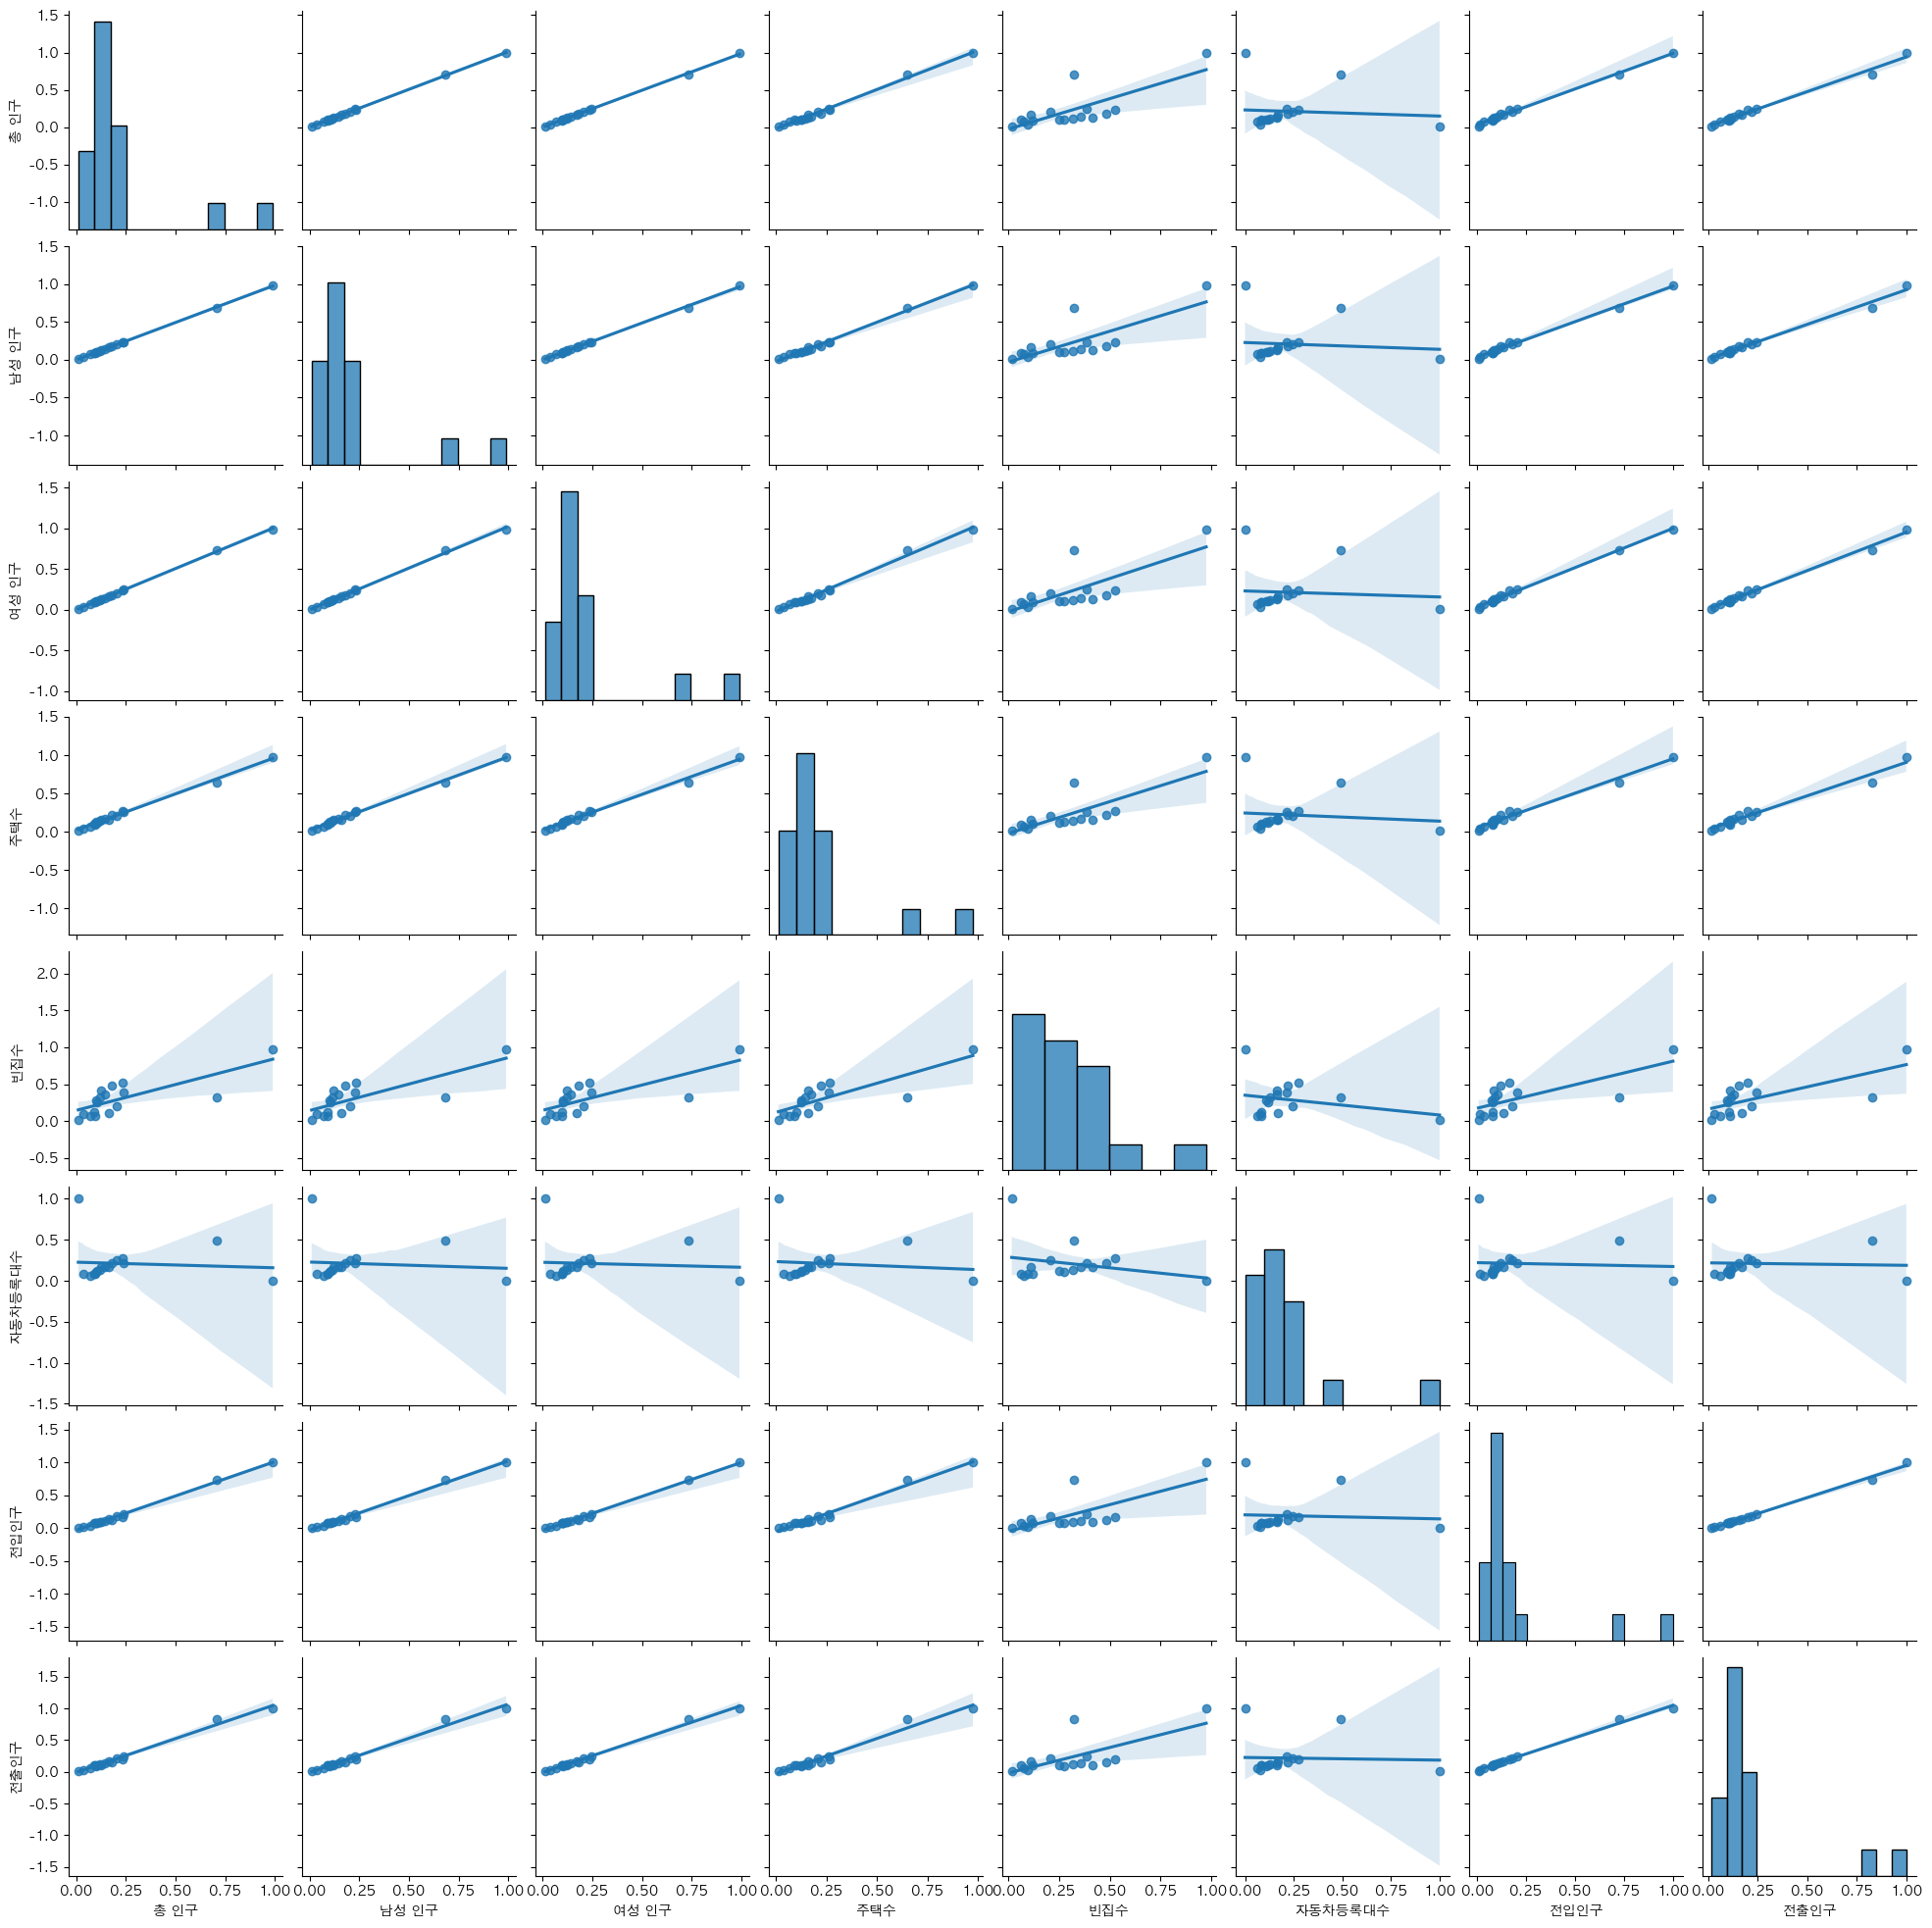

In [54]:
# 남성 인구, 여성 인구, 주택수, 빈집수, 자동차등록대수, 전입인구, 전출인구에 대한 상관관계 시각화
sns.pairplot(
    df_2020,
    vars = df.columns[1:],
    kind = 'reg'
)
plt.show()

### Heatmap을 이용한 확인

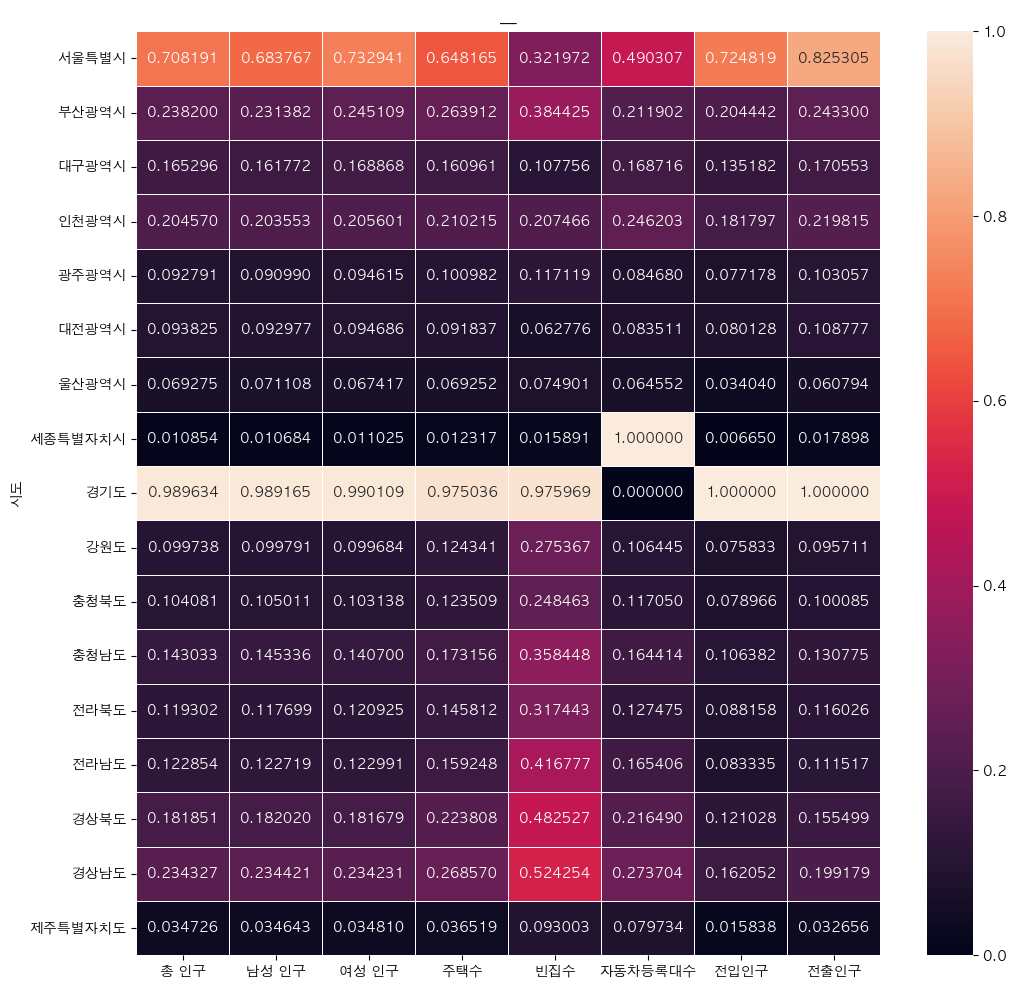

In [56]:
target_col = df_2020.columns

plt.figure(figsize=(12,12))
sns.heatmap(
    df_2020[target_col],
    annot = True, # True로 해야 숫자가 보임
    fmt = 'f', # 실수
    linewidth = 0.5
)
plt.title('__')
plt.show()

----

In [71]:
df_2020 = df[df.index==2020]
df_2020 = df_2020.set_index('시도')
df_2020

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
시도,,,,,,,,
서울특별시,9668465,4701723,4966742,3015371.0,96629.0,38236908,1578127,1642977
부산광역시,3391946,1661000,1730946,1275859.0,113410.0,17823849,491829,506176
대구광역시,2418346,1193109,1225237,809802.0,39069.0,14657442,347248,364083
인천광역시,2942828,1473943,1468885,1032774.0,65861.0,20338870,444556,460304
광주광역시,1450062,717348,732714,538275.0,41585.0,8495770,226163,232246
대전광역시,1463882,730699,733183,496875.0,26983.0,8410085,232321,243418
울산광역시,1136017,583708,552309,394634.0,30241.0,7019991,136112,149696
세종특별자치시,355831,177568,178263,136887.0,14385.0,75608185,78934,65909
경기도,13427014,6754469,6672545,4495115.0,272358.0,2286965,2152572,1984199


In [72]:
col = df_2020.columns
x = df_2020[col].values
x

array([[9.6684650e+06, 4.7017230e+06, 4.9667420e+06, 3.0153710e+06,
        9.6629000e+04, 3.8236908e+07, 1.5781270e+06, 1.6429770e+06],
       [3.3919460e+06, 1.6610000e+06, 1.7309460e+06, 1.2758590e+06,
        1.1341000e+05, 1.7823849e+07, 4.9182900e+05, 5.0617600e+05],
       [2.4183460e+06, 1.1931090e+06, 1.2252370e+06, 8.0980200e+05,
        3.9069000e+04, 1.4657442e+07, 3.4724800e+05, 3.6408300e+05],
       [2.9428280e+06, 1.4739430e+06, 1.4688850e+06, 1.0327740e+06,
        6.5861000e+04, 2.0338870e+07, 4.4455600e+05, 4.6030400e+05],
       [1.4500620e+06, 7.1734800e+05, 7.3271400e+05, 5.3827500e+05,
        4.1585000e+04, 8.4957700e+06, 2.2616300e+05, 2.3224600e+05],
       [1.4638820e+06, 7.3069900e+05, 7.3318300e+05, 4.9687500e+05,
        2.6983000e+04, 8.4100850e+06, 2.3232100e+05, 2.4341800e+05],
       [1.1360170e+06, 5.8370800e+05, 5.5230900e+05, 3.9463400e+05,
        3.0241000e+04, 7.0199910e+06, 1.3611200e+05, 1.4969600e+05],
       [3.5583100e+05, 1.7756800e+05, 1.7

In [73]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[0.71245533, 0.68788553, 0.73733771, 0.66047118, 0.31880856,
        0.49030749, 0.7229772 , 0.82212179],
       [0.23227546, 0.22555182, 0.23908463, 0.26133832, 0.383858  ,
        0.2119016 , 0.19911624, 0.22951014],
       [0.157791  , 0.15441026, 0.16121474, 0.15440105, 0.09568443,
        0.16871619, 0.12939288, 0.15543739],
       [0.19791606, 0.19711031, 0.19873205, 0.20556221, 0.19954026,
        0.24620301, 0.17631911, 0.20559717],
       [0.08371323, 0.08207209, 0.08537526, 0.0920989 , 0.10543739,
        0.08467951, 0.07100034, 0.08671108],
       [0.08477052, 0.08410207, 0.08544748, 0.08259963, 0.04883457,
        0.08351089, 0.07397   , 0.09253502],
       [0.05968748, 0.06175249, 0.05759621, 0.05914032, 0.0614638 ,
        0.06455193, 0.02757376, 0.04367796],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 1.      

In [75]:
# 정규화된 데이터프레임 생성
df_2020_norm = pd.DataFrame(x_scaled, columns=col, index=df_2020.index)
# df_2020_norm['시도'] = df['시도']
df_2020_norm

,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수,전입인구,전출인구
시도,,,,,,,,
서울특별시,0.712455,0.687886,0.737338,0.660471,0.318809,0.490307,0.722977,0.822122
부산광역시,0.232275,0.225552,0.239085,0.261338,0.383858,0.211902,0.199116,0.229510
대구광역시,0.157791,0.154410,0.161215,0.154401,0.095684,0.168716,0.129393,0.155437
인천광역시,0.197916,0.197110,0.198732,0.205562,0.199540,0.246203,0.176319,0.205597
광주광역시,0.083713,0.082072,0.085375,0.092099,0.105437,0.084680,0.071000,0.086711
대전광역시,0.084771,0.084102,0.085447,0.082600,0.048835,0.083511,0.073970,0.092535
울산광역시,0.059687,0.061752,0.057596,0.059140,0.061464,0.064552,0.027574,0.043678
세종특별자치시,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
경기도,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
